reproduce 4.1 figure 3 "large scale" in Vertex nomination: The canonical sampling and the extended spectral nomination schemes

In [25]:
import numpy as np
from graspologic.nominate import SpectralVertexNominator
from graspologic.simulations import sbm
import time

In [10]:
# probability matrix function from paper, differetiation between blocks controlled by parameter alpha
def probability_matrix(alpha: float):
    # p matrix def from paper
    p = np.array([[.5, .3, .4],
                  [.3, .8, .6],
                  [.4, .6, .3]])
    c = np.ones((3, 3), dtype=np.float)*.5
    prob = alpha * p + (1-alpha) * c
    return prob


In [27]:
def get_acc(m, verts, alpha, svn, trials=100):
    p = probability_matrix(alpha)
    total_verts = sum(verts)
    correct = np.zeros(total_verts)
    for i in range(trials):
        adj = sbm(verts, p)
        seed = np.random.choice(verts[0], size=m, replace=False).astype(np.int)
        seed = np.concatenate([seed.reshape(-1,1), np.zeros((m, 1), dtype=np.int)], axis=1)
        nomination_matrix, _ = svn.fit_transform(adj, seed, k=total_verts)
        correct[np.argwhere(nomination_matrix.T[0] <= verts[0])] += 1
    g1_correct_prob = correct / trials
    return g1_correct_prob


avg time (sampling, embedding, nomination): 0.007717525959014893


Text(0.5, 1.0, 'Spectral Nomination Correctness on "Medium" Scale:')

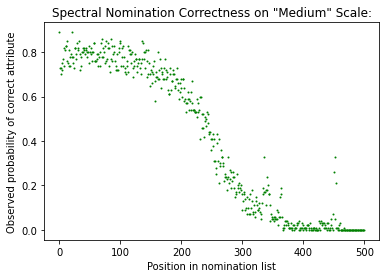

In [29]:
from matplotlib import pyplot as plt
svn = SpectralVertexNominator(persistent=False)

# medium scale, from paper
alpha = .3
verts = [220, 150, 150]
seed_size = 20

start = time.time()
probs = get_acc(seed_size, verts, alpha, svn)
end = time.time()
print("avg time (sampling, embedding, nomination): " + str((end - start)/100))


plt.scatter(np.arange(probs.shape[0] - seed_size), probs[seed_size:], s=1, color='green')
plt.xlabel('Position in nomination list')
plt.ylabel('Observed probability of correct attribute')
plt.title('Spectral Nomination Correctness on "Medium" Scale:')

avg time (sampling, embedding, nomination): 3.7313387966156006


Text(0.5, 1.0, 'Spectral Nomination Correctness on "Large" Scale:')

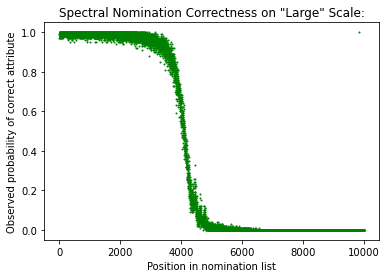

In [30]:
from matplotlib import pyplot as plt
svn = SpectralVertexNominator(persistent=False)

# medium scale, from paper
alpha = .13
verts = [4040, 3000, 3000]
seed_size = 40

start = time.time()
probs = get_acc(seed_size, verts, alpha, svn)
end = time.time()
print("avg time (sampling, embedding, nomination): " + str((end - start)/100))

plt.scatter(np.arange(probs.shape[0] - seed_size), probs[seed_size:], s=1, color='green')
plt.xlabel('Position in nomination list')
plt.ylabel('Observed probability of correct attribute')
plt.title('Spectral Nomination Correctness on "Large" Scale:')
